In [ ]:
# Import Library yang Diperlukan
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Memuat data dari file JSON menggunakan path absolut
with open(r'C:\Users\M Romanda Ilhan\Documents\skripsi ilham\dataset\data.json', 'r') as file:
    data = json.load(file)

# Convert data menjadi DataFrame
df = pd.DataFrame(data)

# Menampilkan beberapa data untuk memastikan formatnya benar
df.head()


,Usia,Jenis Kelamin,Keluhan,Diagnosa,Tanggal Kunjungan
0,19,Laki-laki,Muntah,Gout,2024-11-08
1,25,Perempuan,Muntah,Gastroenteritis,2024-01-19
2,61,Laki-laki,Mual,Hernia Diskus,2024-04-11
3,53,Perempuan,Nyeri sendi,Hernia Diskus,2024-04-23
4,51,Laki-laki,Sakit tenggorokan,Gastroenteritis,2024-04-15


In [14]:
# Preprocessing: Encoding categorical data
label_encoder = LabelEncoder()

# Encode 'Jenis Kelamin' dan 'Diagnosa' ke dalam angka
df['Jenis Kelamin'] = label_encoder.fit_transform(df['Jenis Kelamin'])
df['Diagnosa'] = label_encoder.fit_transform(df['Diagnosa'])

# Encode 'Keluhan' dengan feature ekstraksi panjang kata
keluhan_encoded = df['Keluhan'].apply(lambda x: x.split() if isinstance(x, str) else [])
keluhan_encoded = keluhan_encoded.apply(lambda x: [len(word) for word in x])
keluhan_features = keluhan_encoded.apply(lambda x: sum(x) if isinstance(x, list) else 0)

# Tambahkan fitur ke DataFrame
df['Keluhan_Feat'] = keluhan_features

# Simpan hasil preprocessing ke CSV
df.to_csv(r'C:\Users\M Romanda Ilhan\Documents\skripsi ilham\dataset\data_preprocessed.csv', index=False)

# Tampilkan 5 data teratas
df.head()

OSError: Cannot save file into a non-existent directory: 'C:\Users\M Romanda Ilhan\Documents\skripsi ilham\dataset'

In [9]:
# Fitur dan Target variable
X = df[['Usia', 'Jenis Kelamin', 'Keluhan_Feat']]
y = df['Diagnosa']

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Membangun dan melatih model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Prediksi dan evaluasi model SVM
svm_pred = svm_model.predict(X_test)

# Menampilkan hasil evaluasi
print("SVM Accuracy: ", accuracy_score(y_test, svm_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))


SVM Accuracy:  0.03333333333333333
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.04      0.20      0.07         5
           1       0.00      0.00      0.00         4
           2       0.07      0.12      0.09         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         6

    accuracy                           0.03        60
   macro avg       0.01      0.03      0.02        60
weighted avg       0.01      0.03      0.02        60



c:\Users\Z10 Metal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Z10 Metal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Z10 Metal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [11]:
# Membangun dan melatih model MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000)
mlp_model.fit(X_train, y_train)

# Prediksi dan evaluasi model MLP
mlp_pred = mlp_model.predict(X_test)

# Menampilkan hasil evaluasi
print("MLP Accuracy: ", accuracy_score(y_test, mlp_pred))
print("MLP Classification Report:\n", classification_report(y_test, mlp_pred))


MLP Accuracy:  0.13333333333333333
MLP Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.09      0.25      0.13         4
           2       0.00      0.00      0.00         8
           3       0.33      0.33      0.33         6
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         3
           7       0.12      0.71      0.20         7
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         6

    accuracy                           0.13        60
   macro avg       0.05      0.13      0.07        60
weighted avg       0.05      0.13      0.07        60



c:\Users\Z10 Metal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Z10 Metal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Z10 Metal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [12]:
# Evaluasi dan komparasi antara kedua model
print("Evaluasi Model SVM dan MLP")

# Akurasi model SVM
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"Akurasi SVM: {svm_accuracy * 100:.2f}%")

# Akurasi model MLP
mlp_accuracy = accuracy_score(y_test, mlp_pred)
print(f"Akurasi MLP: {mlp_accuracy * 100:.2f}%")


Evaluasi Model SVM dan MLP
Akurasi SVM: 3.33%
Akurasi MLP: 13.33%


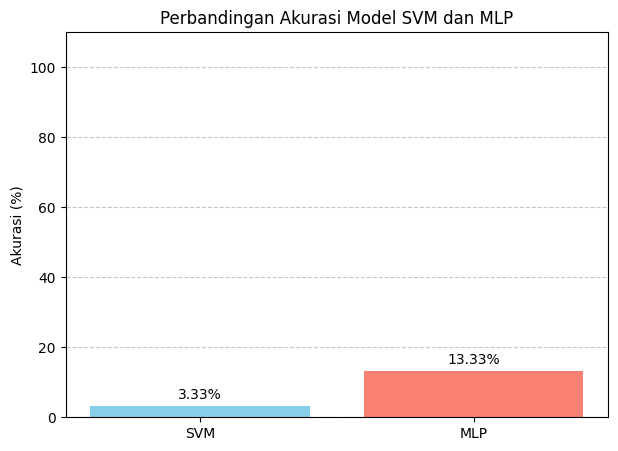

In [13]:
import matplotlib.pyplot as plt

# Data akurasi
models = ['SVM', 'MLP']
accuracies = [svm_accuracy * 100, mlp_accuracy * 100]

# Buat grafik batang
plt.figure(figsize=(7, 5))
bars = plt.bar(models, accuracies, color=['skyblue', 'salmon'])

# Tambahkan nilai di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

# Label dan judul
plt.title('Perbandingan Akurasi Model SVM dan MLP')
plt.ylabel('Akurasi (%)')
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan grafik
plt.show()


## 🔁 Versi Baru: SVM & MLP dengan GridSearchCV

In [8]:
df = pd.read_csv("../dataset/data_preprocessed.csv")  # Pastikan path benar
df.columns = df.columns.str.strip()  # Menghapus spasi pada nama kolom

df.head()  # Menampilkan 5 data awal

,Usia,Jenis Kelamin,Keluhan,Diagnosa,Tanggal Kunjungan,Keluhan_Feat
0,19,0,Muntah,3,2024-11-08,6
1,25,1,Muntah,2,2024-01-19,6
2,61,0,Mual,4,2024-04-11,4
3,53,1,Nyeri sendi,4,2024-04-23,10
4,51,0,Sakit tenggorokan,2,2024-04-15,16


In [9]:
X = df.drop("Diagnosa", axis=1)
y = df["Diagnosa"]

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
from sklearn.preprocessing import LabelEncoder

# Buat salinan data agar tidak mengubah aslinya
df_encoded = df.copy()

# Encode semua kolom yang bertipe object (string)
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

In [14]:
X = df_encoded.drop("Diagnosa", axis=1)
y = df_encoded["Diagnosa"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.001, 0.01, 0.1, 'scale', 'auto']
}

grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 'scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [20]:
svm_pred = grid_svm.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred)
print("Akurasi SVM dengan GridSearchCV:", round(svm_acc, 2))
print("Best SVM Params:", grid_svm.best_params_)

Akurasi SVM dengan GridSearchCV: 0.08
Best SVM Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [21]:
param_grid_mlp = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'max_iter': [500]
}


In [22]:
grid_mlp = GridSearchCV(MLPClassifier(random_state=42), param_grid_mlp, cv=5)
grid_mlp.fit(X_train_scaled, y_train)

c:\Users\M Romanda Ilhan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M Romanda Ilhan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M Romanda Ilhan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M Romanda Ilhan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M Romanda Ilhan\anacond

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(10,), (50,), (100,)],
                         'max_iter': [500], 'solver': ['adam', 'sgd']})

In [23]:
mlp_pred = grid_mlp.predict(X_test_scaled)
mlp_acc = accuracy_score(y_test, mlp_pred)
print("Akurasi MLP dengan GridSearchCV:", round(mlp_acc, 2))
print("Best MLP Params:", grid_mlp.best_params_)

Akurasi MLP dengan GridSearchCV: 0.07
Best MLP Params: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'max_iter': 500, 'solver': 'sgd'}
